<a href="https://colab.research.google.com/github/Hemant9785/deep-learning-/blob/main/mlp_mosquito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:


df = pd.read_excel('/content/Mosquito_EXP.xlsx')

In [3]:
df.shape

(1678, 11)

In [4]:
df.iloc[0:5]

,MQ2,MQ3,MQ4,MQ7,MQ9,MQ135,MQ6,MQ8,Temp,Humidity,Gas
0,31,88,65,96,65,96,88,31,31.4,45.8,Fresh Air
1,40,159,210,176,213,176,158,40,31.4,45.7,Fresh Air
2,41,185,355,223,357,223,183,41,31.4,45.6,Fresh Air
3,41,192,459,249,460,249,189,41,31.5,45.7,Fresh Air
4,41,196,516,266,518,265,194,41,31.5,44.5,Fresh Air


In [5]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MQ2       1678 non-null   int64  
 1   MQ3       1678 non-null   int64  
 2   MQ4       1678 non-null   int64  
 3   MQ7       1678 non-null   int64  
 4   MQ9       1678 non-null   int64  
 5   MQ135     1678 non-null   int64  
 6   MQ6       1678 non-null   int64  
 7   MQ8       1678 non-null   int64  
 8   Temp      1678 non-null   float64
 9   Humidity  1678 non-null   float64
 10  Gas       1678 non-null   object 
dtypes: float64(2), int64(8), object(1)
memory usage: 144.3+ KB


In [6]:
df['Gas'].value_counts()

Liquid            342
Incense Sticks    340
Hit               317
Fast Card         264
EGG TRAY          178
Fresh Air         148
Coil               89
Name: Gas, dtype: int64

In [8]:
X = df.drop(['Gas'], axis=1)

y = df['Gas']

In [9]:
from sklearn import preprocessing
lc = preprocessing.LabelEncoder()
y = lc.fit_transform(df['Gas'])

y = pd.DataFrame(y,columns=['Gas'])
X  = X.values

In [10]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [14]:
# 2 Loading the libraries
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

In [16]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [18]:
y_pred = mlp_clf.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.87


Text(95.72222222222221, 0.5, 'Truth')

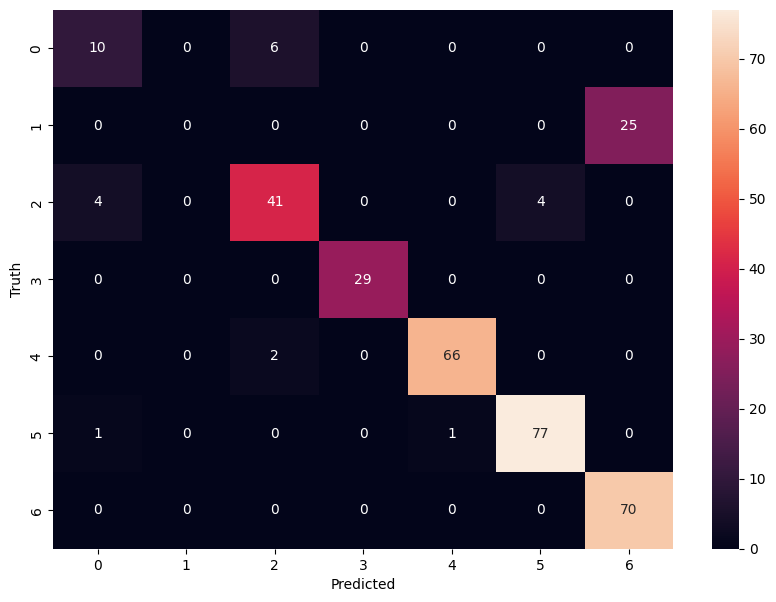

In [20]:
# confusion matrix
import matplotlib.pyplot as plt
import tensorflow as tf

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='micro')
# (0.33..., 0.33..., 0.33..., None)


(0.8720238095238095, 0.8720238095238095, 0.8720238095238096, None)